This notebook is meant to provide as summary of the UrbanSound8K to assist in feature extraction and modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from us8kdata.loader import UrbanSound8K

# Overview of data
- number of classes
- number of folds
- number of examples per class
- distribution of file lengths
- distribution of file length per class
- distribution of file length per fold

All operations below assume that the UrbanSound8K data has been converted using `us8kdata-convert` and placed in `../hasp/data/`, that is, `../hasp/data/` should have the following structure.
``` sh
../hasp/data
├── fold1
├── fold10
├── fold2
├── fold3
├── fold4
├── fold5
├── fold6
├── fold7
├── fold8
├── fold9
└── metadata
```

## Shape and content of metadata

In [2]:
data = UrbanSound8K('../hasp/data')
df = data.metadata
display(df.head())
sr = data.sample_rate
print(f'Dataset sample rate {sr}')

,slice_file_name,salience,fold,classID,class
0,100032-3-0-0.wav,1,5,3,dog_bark
1,100263-2-0-117.wav,1,5,2,children_playing
2,100263-2-0-121.wav,1,5,2,children_playing
3,100263-2-0-126.wav,1,5,2,children_playing
4,100263-2-0-137.wav,1,5,2,children_playing


Dataset sample rate 16000


In [3]:
display(df.shape)
df.nunique()

(8732, 5)

slice_file_name    8732
salience              2
fold                 10
classID              10
class                10
dtype: int64

In [20]:
df['class'].value_counts().to_frame()

,class
dog_bark,1000
children_playing,1000
air_conditioner,1000
street_music,1000
engine_idling,1000
jackhammer,1000
drilling,1000
siren,929
car_horn,429
gun_shot,374


## File length statistics

In [5]:
file_lengths = [len(sample_array) for sample_array in data.fold_audio_generator(data.get_folds())]

In [6]:
df['length_samples'] = file_lengths
df['length_seconds'] = df.length_samples / sr

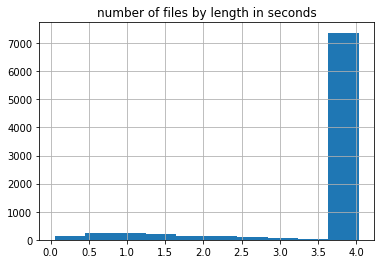

In [14]:
df.length_seconds.hist();
plt.title('number of files by length in seconds');

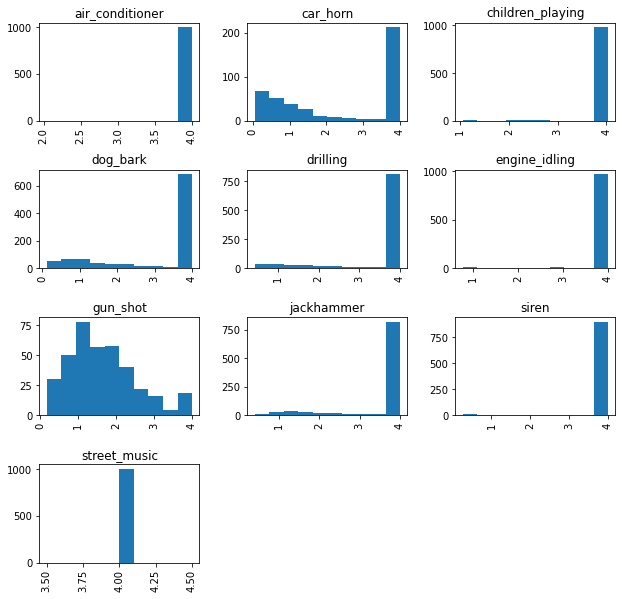

In [21]:
df[['class', 'length_seconds']].hist(by='class', figsize=(10, 10));

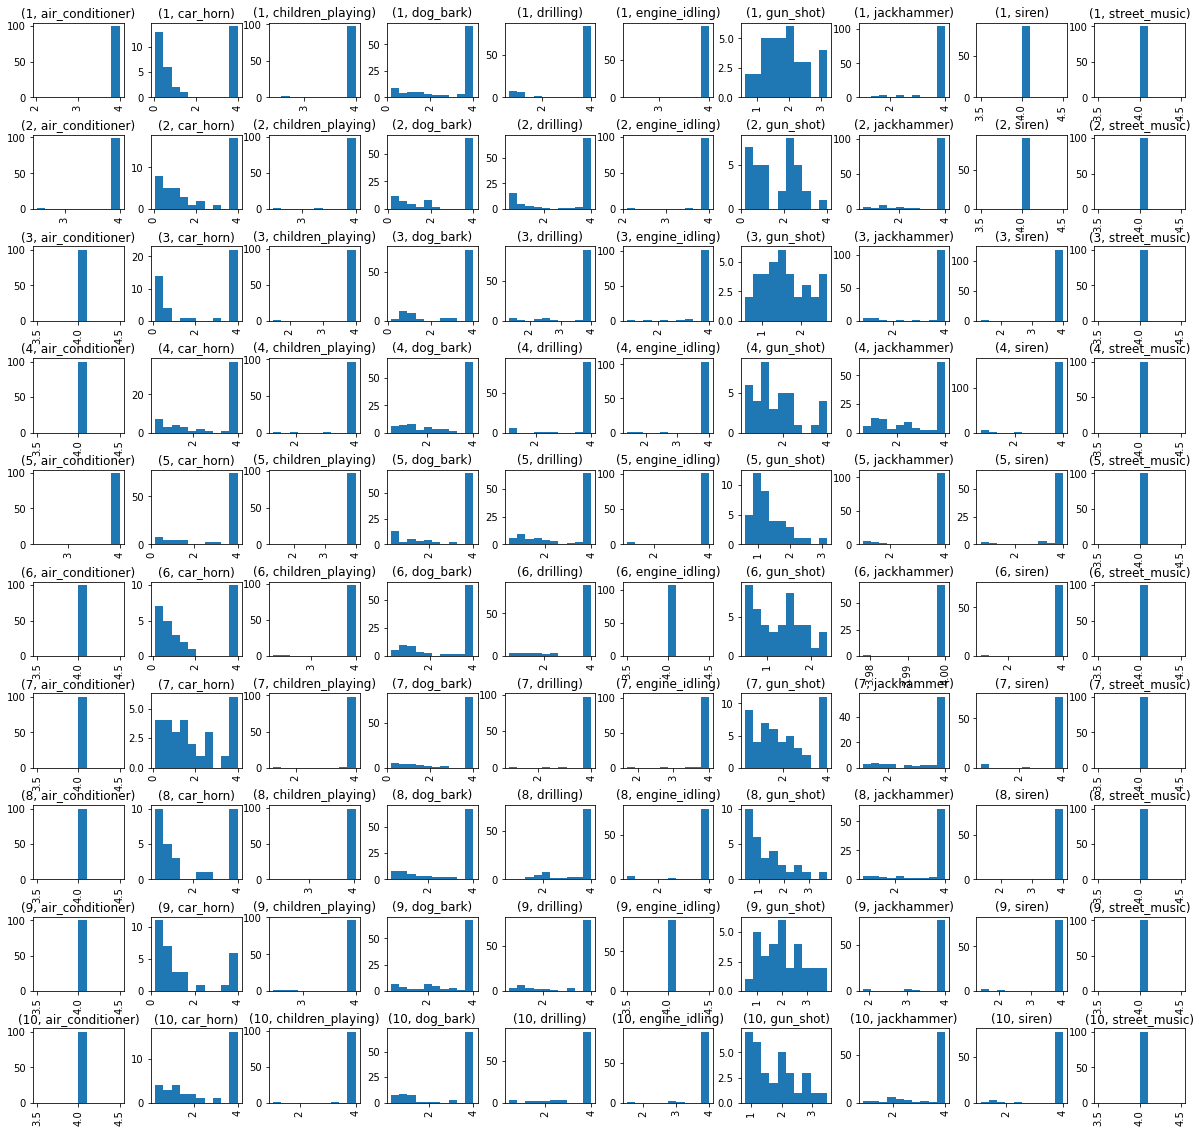

In [25]:
df[['fold', 'class', 'length_seconds']].hist('length_seconds', by=['fold', 'class'], figsize=(20, 20));